# CSII 2024 Exercise 02: Diagonalization, Modal Analysis, Controllability and Observability
&copy; 2024 ETH Zurich, Felix Schnitzler, Niclas Scheuer, Dejan Milojevic; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli


Welcome to the second CSII notebook! In the last notebook we introduced two models: the _aircraft model_ and the _CSII Bot_. In this notebook we will futher invesigate the aircraft model with the following objectives:

1) Use diagonalization to compute the modal decomposition of the aircraft model,
2) Visualize the different modes of the system,
3) Show if the model is controllable and/or observable.

To start, run the following cell to install the necessary modules and import the libraries.

In [2]:
#%pip install cs2solutions --force-reinstall

from cs2solutions import decomp

import numpy as np
import control as ct
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, precision=3)

## Exercise 1: Modal Decomposition of the Aircraft Model

To perform the modal decomposition of the System we need to find a coordinate transformation $\tilde{x} = T^{-1} x$, that diagonalizes the A-matrix of the state-space model.

$$
\begin{cases}
\dot{x} &= Ax + Bu, \\
y &= Cx + Du.
\end{cases}
\quad \Rightarrow \quad
\begin{cases}
T\dot{x} &= AT\tilde{x} + Bu, \\
y &= CT\tilde{x} + Du.
\end{cases}
$$

If we multiply the equations by $T^{-1}$ we find a definition for the state-space model in modal coordinates:

$$
\begin{align}
\dot{\tilde{x}} &= (T^{-1}AT)\tilde{x} + (T^{-1}B)u,\\
y &= (CT)\tilde{x} + Du.
\end{align}
$$

And we can define the new matrices as follows: 
$\quad \tilde{A} = T^{-1}AT, \quad \tilde{B} = T^{-1}B, \quad\tilde{C} = CT, \quad \tilde{D} = D$.

Remember that this coordinate transform does not change the structural properties of the system and the time response is exactly the same!

### 1.1 Define Aircraft Model
For this exercise we use the aircraft model introduced in the __Introductory Notebook 2__. Feel free to look at this notebook again if you need to. Run the next cell to define the longitudinal dynamics of the aircraft.

In [3]:
# Given matrices A and B
A = np.array([
    [-15.5801,  4.7122, -38.7221,  0.0000],
    [ -0.5257, -0.0166,   2.3501, -9.7847],
    [  4.4044, -1.5325, -18.1615, -0.7044],
    [  0.9974,  0.0000,   0.0000,  0.0000]
])

B = np.array([
    [-421.2001],
    [   1.3231],
    [ -17.3812],
    [   0.0000]
])

# Define the output matrix C and the feedthrough matrix D
C = np.array([0, 0, 0, 1])
D = 0

# Create a state-space system using the matrices A, B, C, and D
sys = ct.ss(A, B, C, D)

### 1.2 Diagonalization of the A-Matrix

To diagonalize the A-matrix we can perform the following transformations: $\tilde{x} = Vx, \quad \tilde{A} =\Lambda = V^{-1}AV$, where $V$ is the matrix containing the eigenvectors of $A$ as columns and $\Lambda = diag(\lambda_1, ..., \lambda_n)$ with the eigenvalues $\lambda_i$ of A.

Try to implement the function below that calculates the eigenvalues and the eigenvectors of a matrix.<br>
\
__Hints:__
1) Use `np.linalg.eig()` to compute the eigenvalues and eigenvectors.
2) Use `np.linalg.inv()` to compute the inverse of a matrix.
3) Matrix multiplication in python is done with `A @ B`.

Use the documentation for the [`numpy.linalg`](https://numpy.org/doc/stable/reference/routines.linalg.html) sub-module to learn about these functions.

In [6]:
def diagonalize_system(A: np.array, B: np.array, C: np.array, D: np.array) -> tuple[np.array]:
    """
    Diagonalizes a linear time-invariant system represented by its state-space matrices.

    Parameters:
    A (np.array): State matrix of the system.
    B (np.array): Input matrix of the system.
    C (np.array): Output matrix of the system.
    D (np.array): Feedthrough matrix of the system.

    Returns:
    A_tilde (np.array): Diagonalized state matrix.
    B_tilde (np.array): Diagonalized input matrix.
    C_tilde (np.array): Diagonalized output matrix.
    D_tilde (np.array): Diagonalized feedthrough matrix.
    """
    
    # TODO: replace the next line with your implementation
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Compute the transformed state-space representation
    # TODO: replace the next line with your implementation
    A_tilde = np.diag(eigenvalues)
    B_tilde = np.linalg.inv(eigenvectors) @ B
    C_tilde = C @ eigenvectors
    D_tilde = D
    
    return A_tilde, B_tilde, C_tilde, D_tilde

#print(diagonalize_system(A, B, C, D))

(array([[-16.874+13.113j,   0.    +0.j   ,   0.    +0.j   ,
          0.    +0.j   ],
       [  0.    +0.j   , -16.874-13.113j,   0.    +0.j   ,
          0.    +0.j   ],
       [  0.    +0.j   ,   0.    +0.j   ,  -0.005 +1.764j,
          0.    +0.j   ],
       [  0.    +0.j   ,   0.    +0.j   ,   0.    +0.j   ,
         -0.005 -1.764j]]), array([[220.415 +6.269j],
       [220.415 -6.269j],
       [  1.946+45.013j],
       [  1.946-45.013j]]), array([0.035+0.027j, 0.035-0.027j, 0.019+0.168j, 0.019-0.168j]), 0)


The code below serves to test your code. Feel free to run the unit test.

The solution can be found by inspecting ``decomp.sol_diagonalize_system`` or on [GitHub](https://github.com/idsc-frazzoli/cs2solutions/blob/fb30ba4d3fa1d034b5c368a37305df41a5cf4e01/src/cs2solutions/decomp.py#L29-L70)


In [5]:
decomp.test_diagonalize_system(diagonalize_system, decomp.sol_diagonalize_system, A, B, C, D, False)

Passed tests: 3  out of 3


True

## Exercise 2: Modal Analysis

In this exercise, we aim to analyze and visualize the modes of the aircraft model. This involves examining the relationship between each eigenvalue of the system and its corresponding eigenvector, which satisfies the equation $Av_i = \lambda_i v_i$. Each eigenvector represents the configuration of a mode within the system.

Looking again at the eigenvalues of matrix $A$, we find four eigenvalues: $\lambda_{sp} = -16.8739 \pm 13.1129j$ and $\lambda_{ph} = -0.0052 \pm 1.7644j$. It's important to note that these represent two complex-conjugate pairs of eigenvalues (and thus, eigenvectors), indicating just two distinct modes in the system. In aviation, these are referred to as the **Short Period** mode and the **Phugoid** mode.

The eigenvalue tells us how the amplitude of the mode changes over time, according to $\tilde{x}_i(t) = e^{\lambda_it}\tilde{x}_i(0)$. From this, we understand that the Short Period mode fades away quickly, while the Phugoid mode lasts longer and is more visible in the system's behavior. Since both eigenvalues are complex we expect oscillations to occur.

### 2.1 Short Period Mode
The Short Period mode is a key oscillatory behavior of an aircraft, mainly affecting its pitch motion. This mode has a high frequency and low damping, typically seen in response to changes in pitch control inputs and angle of attack. It is one of the two main longitudinal motion modes, the other being the Phugoid mode, which is characterized by lower frequency and higher damping. The Short Period mode is crucial for assessing the aircraft's agility.

In the Short Period mode, the aircraft experiences fast oscillations in pitch, or rotation around the lateral axis. This behavior is controlled by both inertia and aerodynamic forces, making it essential for evaluating the aircraft's stability and responsiveness to control inputs.

<!-- ![short_period.png](images/short_period.png) -->
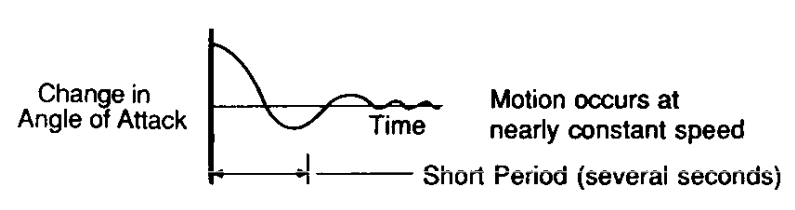

#### Analyzing the Short Period Mode
To investigate the Short Period mode, we look at the eigenvalues and eigenvectors of the system matrix $A$. The eigenvalues give us insight into the stability and dynamics of the mode, while the eigenvectors show us the mode's shape in state space.

In [7]:
eigenvalues, eigenvectors = np.linalg.eig(A)
print(eigenvectors)

[[-0.946+0.j    -0.946-0.j    -0.297+0.032j -0.297-0.032j]
 [ 0.011-0.02j   0.011+0.02j  -0.939+0.j    -0.939-0.j   ]
 [-0.03 +0.318j -0.03 -0.318j  0.007+0.001j  0.007-0.001j]
 [ 0.035+0.027j  0.035-0.027j  0.019+0.168j  0.019-0.168j]]


We start by setting the initial condition $x_0$ for our simulation to align with the real part of the eigenvector linked to the eigenvalue of the Short Period mode. Given the linear nature of our system, utilizing this initial condition allows us to precisely capture and analyze the dynamics inherent to the Short Period mode.

Considering that the first two eigenvectors of matrix $A$ are associated with the Short Period mode, we have the freedom to select either one of them for our analysis. We focus solely on the real part of the eigenvector because our initial condition must be physically plausible, excluding the possibility of employing a complex number for this purpose. It is also noteworthy that since these two eigenvectors are complex conjugates of each other, their real parts merge into an identical vector, simplifying our selection process.

The real part of these eigenvectors is calculated as follows:

$$ Re(v_{1, 2}) = Re \left( \begin{bmatrix} -0.946 \\ 0.011 \mp 0.02j \\ -0.03 \pm 0.318j \\ 0.035 \pm 0.027 \end{bmatrix} \right) = \begin{bmatrix} -0.946 \\ 0.011 \\ -0.03 \\ 0.035 \end{bmatrix}. $$

This representation allows us to understand the physical configuration of the aircraft as it responds to the dynamics of the Short Period mode, based on the specified initial condition.


In [8]:
# Set the eigenvector for the short period mode as the initial condition
# Note: since the eigenvector is complex, we only take the real part

x0_sp = np.real(eigenvectors[:, 0])
print(x0_sp)

[-0.946  0.011 -0.03   0.035]


Using the `ct.initial_response()` function from the `control` library, we simulate the aircraft's response over a short time span, as this mode is characterized by fast dynamics.

In [9]:
# Compute the initial response of the system.
# The mode is fast and the oscillations are damped, so we simulate up to T=0.5s to see the response.

"""
General comment: maybe it's nice for the students to get a reference (hyperlink) to the documentation of the libraries, as
this is an important part of these notebooks (to get used to work with premade functions). If we make it as easy as possible
it is more probable that it will be done.
"""

response_sp = ct.initial_response(sys, T=0.5, X0=x0_sp)
states_sp = response_sp.states # extract the state variables
time_sp = response_sp.time # extract the time vector

Lasty, we plot the state variable and see how they evolve over time for the short period mode.

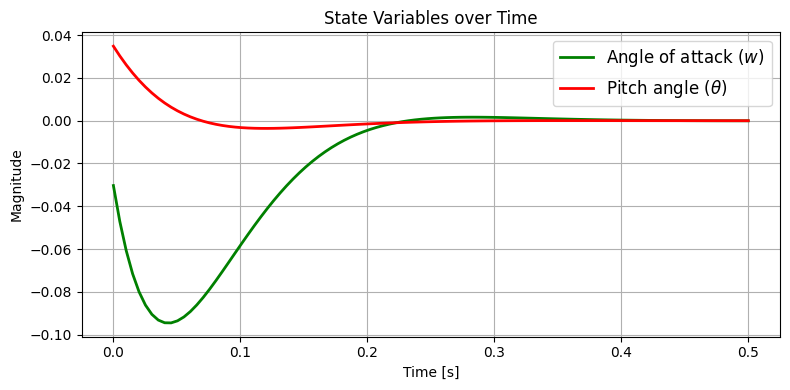

In [16]:
plt.figure(figsize=(8, 4))  # Set figure size

# Plot the state variables
plt.plot(time_sp, states_sp[2], 'g-', label='Angle of attack ($w$)', linewidth=2)
plt.plot(time_sp, states_sp[3], 'r-', label='Pitch angle ($\\theta$)', linewidth=2)

# Enhancements for readability
plt.xlabel('Time [s]')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.title('State Variables over Time')  # Title of the plot
plt.legend(fontsize=12)  # Legend with a slightly larger font
plt.grid(True)  # Add grid lines for better readability

plt.tight_layout()  # Adjust the plot to fit the figure
plt.show()


### 2.2 Phugoid Mode

The Phugoid mode is a fundamental longitudinal mode of an aircraft that typically presents as a long-period oscillation. It is characterized by coupled variations in altitude and speed but with little change in the aircraft's pitch angle. This mode involves the exchange of kinetic and potential energy — similar to a roller coaster going up and down gentle hills.

<!--![phugoid.png](images/phugoid.png)-->
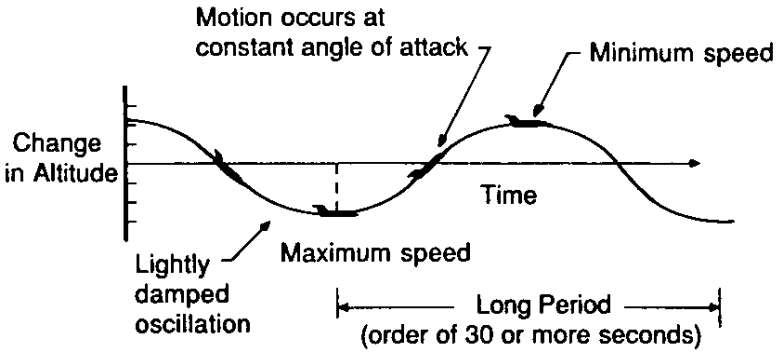

**Understanding the Phugoid Mode Dynamics** <br>
The Phugoid mode dynamics can be observed in the state variables:
- **Forward Speed $u$:** <br>
    Represents the aircraft's speed in the direction of the longitudinal axis. In the Phugoid mode, this will oscillate as the aircraft gains and loses speed during the ascent and descent phases.

- **Pitch Angle $\theta$:** <br>
    Changes in pitch angle are usually small and gradual in the Phugoid mode. This state variable helps us understand how the aircraft's orientation varies over time, with a slow exchange between kinetic and potential energy.

**Initial Conditions for Phugoid Mode** <br>
The initial conditions for the Phugoid mode are set based on the eigenvector corresponding to the Phugoid eigenvalues. These initial conditions reflect a disturbance that excites the Phugoid mode without significantly affecting other modes.

In [17]:
# Here we choose the real part of the third eigenvector as the initial condition
x0_ph = np.real(eigenvectors[:, 2])
print(x0_ph)

[-0.297 -0.939  0.007  0.019]


The step response of the system with initial condition $x_{0,\text{phugoid}}$ simulates how the aircraft will behave over time when the Phugoid mode is excited. The plot shows the oscillatory nature of $u$ and $\theta$, with $u$ depicting the energy exchange in the system and $\theta$ showing slight variations corresponding to the changes in altitude and velocity.

These two states oscilate with a phase shift of nearly $\pi/2$ or equivalently $90^{\circ}$ to one another as seen in the lecture. This coresponds to a sine-cosine behavior.
- **Maximum Slope of $\theta$:** (dashed line) <br>
    $\theta$ has maximum slope and $u$ nearly at a point with slope zero.
- **Zero Slope of $\theta$:** (dotted line) <br>
    Here $\theta$ has a slope of zero and we see that $u$ is nearly at it's point with maximum slope.

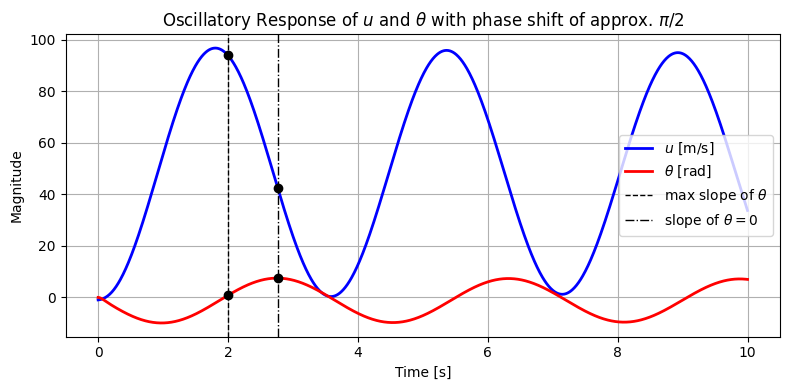

In [21]:
# Compute the step response with initial conditions x0
response_ph = ct.step_response(sys, T=10, X0=x0_ph)

# Define the figure size and plot the state variables
plt.figure(figsize=(8, 4))
plt.plot(response_ph.time, response_ph.states[1], 'b-', label='$u$ [m/s]', linewidth=2)
plt.plot(response_ph.time, response_ph.states[3], 'r-', label='$\\theta$ [rad]', linewidth=2)

# Define the times where vertical lines will be placed and their labels
time_markers = [(2, 'max slope of $\\theta$', '--'), (2.77, 'slope of $\\theta = 0$', '-.')]

# Add vertical lines and points at their intersection with state curves
for tm, label, ls in time_markers:
    plt.axvline(x=tm, color='black', linestyle=ls, linewidth=1, label=label)
    idx = (np.abs(response_ph.time - tm)).argmin()  # Find the index of the time vector closest to the vertical line
    plt.plot(response_ph.time[idx], response_ph.states[1][idx], 'ko')  # Intersection with u
    plt.plot(response_ph.time[idx], response_ph.states[3][idx], 'ko')  # Intersection with theta

# Add grid, labels, title, and legend
plt.grid(True)
plt.xlabel('Time [s]')
plt.ylabel('Magnitude')
plt.title('Oscillatory Response of $u$ and $\\theta$ with phase shift of approx. $\\pi/2$')
plt.legend(loc='right')

plt.tight_layout()
plt.show()

To see that the oscilations of these two states are actually damped we need to simulate the response for a larger time interval. Here we choose an interval of $T=1000s$. We can observe that the states are stable and eventually converge to zero. This shows the difference of the speed of the short period and phugoid. The phugoid is much slower, i.e. it needs much more time to converge compared to the short period.

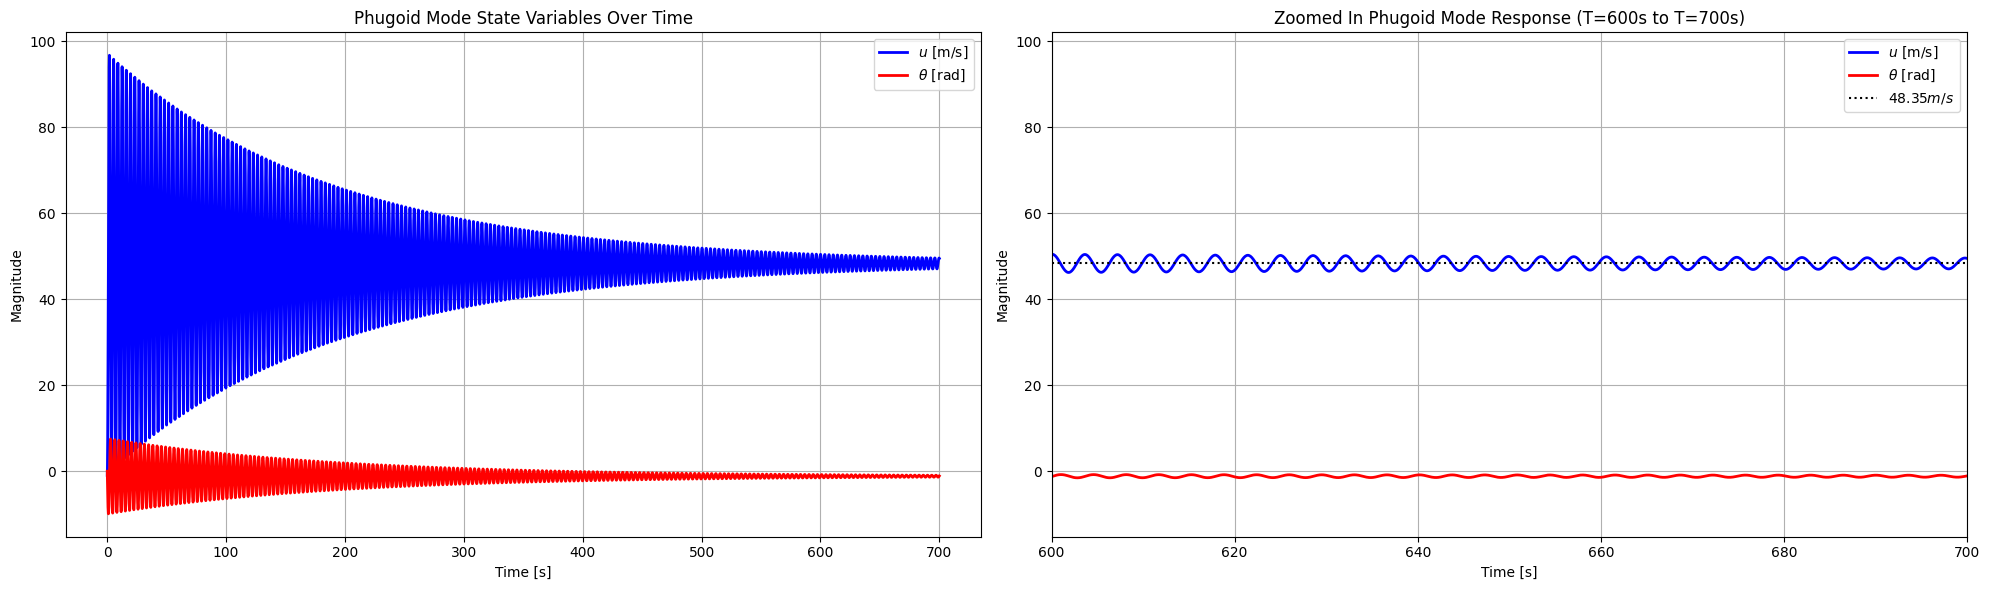

In [22]:
# Calculate eigenvalues, eigenvectors, and set initial condition
x0 = np.real(eigenvectors[:, 2])

# Compute the step response for the system between 0 and 700 seconds with initial condition (x0_ph)
time = np.linspace(0, 700, 10000)
step_response = ct.step_response(sys, time, x0_ph)

# Create a figure and two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# First plot - Full step response
axs[0].plot(step_response.time, step_response.states[1], 'b-', label='$u$ [m/s]', linewidth=2)
axs[0].plot(step_response.time, step_response.states[3], 'r-', label='$\\theta$ [rad]', linewidth=2)
axs[0].set_title('Phugoid Mode State Variables Over Time')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Magnitude')
axs[0].grid(True)
axs[0].legend()

# Second plot - Zoomed-in response from T=600s to T=700s
axs[1].plot(step_response.time, step_response.states[1], 'b-', label='$u$ [m/s]', linewidth=2)
axs[1].plot(step_response.time, step_response.states[3], 'r-', label='$\\theta$ [rad]', linewidth=2)
axs[1].axhline(y=48.35, color='k', linestyle=':', label='$48.35 m/s$')  # Add horizontal line
axs[1].set_xlim(600, 700)  # Set x-axis limits to zoom in
axs[1].set_title('Zoomed In Phugoid Mode Response (T=600s to T=700s)')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Magnitude')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


## Exercise 3: Controllability and Observability

In the last part of this notebook we want to show if the aircraft model is controllable (reachable) and/or observable. This is especially important for designing a controller. To understand how we can change the behavior of the states through our inputs, we need to assess the controllability and observability of our system.

Recall that in the lecture 2 the __reachability matrix__ $\mathcal{R}$ and the __observability matrix__ $\mathcal{O}$ were introduced:

$$
\mathcal{R} =
\begin{bmatrix} B & AB & A^2B & ... & A^{n-1}B \end{bmatrix},
\qquad
\mathcal{O} = \begin{bmatrix} C \\ CA \\ \vdots \\ CA^{n-1} \end{bmatrix}.
$$

The system is fully controllable or observable if $rank(\mathcal{R}) = n$ or $rank(\mathcal{O}) = n$ respectively.


Try to implement the functions below that check the controllability / observability of the system.

\
Hints:
- use `A.shape[0]` to get the number of states $n$.
- use `np.linalg.matrix_power(M, i)` to calculate the matrix power $M^i$.
- use `M = np.hstack(M, v)` to append a columnvector $v$ to the matrix $M$.
- use `M = np.vstack(M, v)` to append a rowvector $v$ to the matrix $M$.

As always, feel free to take a look at the documentation of the numpy library.

In [43]:
def controllable(A: np.array, B: np.array) -> bool:
    """
    Check the controllability of a system given the state-space representation.

    Parameters:
    - ``A`` (np.array): The state matrix.
    - ``B`` (np.array): The input matrix.

    Returns:
    - () -> bool: A boolean indicating whether the system is controllable.
    """
    
    # TODO: Get the number of columns in matrix A.
    n = A.shape[0]
    
    """
    Maybe leave out the hints for the B matrix?
    """
    # TODO: Initialize the reachability matrix R with matrix B", since the first column of R is always B."
    R = B
    #print(R)
    
    # Use a for loop to compute each column of the reachability matrix and append it to R.
    for i in range(1, n):  # Iterate from 1 to n-1.
        # TODO: Compute the i-th column of the reachability matrix and concatenate it horizontally to R.
        R = np.concatenate((R, np.linalg.matrix_power(A,i) @ B), axis=1)
        
        
    # TODO: Compute the rank of the reachability matrix.
    #print(R)
    rank = np.linalg.matrix_rank(R)
    
    if rank == A.shape[0]:
        print(f"The system is controllable with rank {rank}.")
        return True
    else:
        print(f"The system is not controllable with rank {rank}.")
        return False

In [45]:
def observable(A: np.array, C: np.array) -> bool:
    """
    Check the observability of a system given the state-space representation.

    Parameters:
    - ``A`` (np.array): The state matrix.
    - ``C`` (np.array): The output matrix.

    Returns:
    - () -> bool: A boolean indicating whether the system is observable.
    """
    
    # TODO: Get the number of rows in matrix A.
    n = A.shape[1]
    
    # TODO: Initialize the observability matrix O with matrix C, since the first row of O is always C.
    O = C
    
    # TODO: Calculate the observability matrix for each power of A and concatenate it vertically to O.
    for i in range(1, n):  # Iterate from 1 to n-1.
        O = np.concatenate((O, C @ np.linalg.matrix_power(A,i)), axis=0)
    
    rank = np.linalg.matrix_rank(O)
    
    if rank == A.shape[0]:
        print(f"The system is observable with rank {rank}.")
        return True
    else:
        print(f"The system is not observable with rank {rank}.")
        return False

Below some unit tests to check your solutions:


In [44]:
decomp.test_controllable(controllable, decomp.sol_controllable)

Student solution:
The system is controllable with rank 2.
True
Master solution:
The system is controllable with rank 2.
True
Student solution:
The system is controllable with rank 4.
True
Master solution:
The system is controllable with rank 4.
True
Passed tests: 2  out of 2


True

In [46]:
decomp.test_observable(observable, decomp.sol_observable)

Student solution:
The system is observable with rank 2.
True
Master solution:
The system is observable with rank 2.
True
Student solution:
The system is not observable with rank 0.
False
Master solution:
The system is not observable with rank 0.
False
Passed tests: 2  out of 2


True

Solution ``controllable``: Inspect ``decomp.sol_controllable`` or check on [GitHub](https://github.com/idsc-frazzoli/cs2solutions/blob/fb30ba4d3fa1d034b5c368a37305df41a5cf4e01/src/cs2solutions/decomp.py#L146-L172)

Solution ``observable``: Inspect ``decomp.sol_observable`` or check on [GitHub](https://github.com/idsc-frazzoli/cs2solutions/blob/fb30ba4d3fa1d034b5c368a37305df41a5cf4e01/src/cs2solutions/decomp.py#L174-L203)

#### __Additional Information__

The `control` module has the functions `ct.ctrb(A, B)` and `ct.obsv(A, C)` that compute the reachability and observability matrices directly.

Example:

In [47]:
# Compute the controllability matrix R using the ctrb() function from the control module
R = ct.ctrb(A, B)

# Calculate the rank of the controllability matrix R using the matrix_rank() function from numpy
rank_R = np.linalg.matrix_rank(R)

# Compute the observability matrix O using the obsv() function from the control module
O = ct.obsv(A, C)

# Calculate the rank of the observability matrix O using the matrix_rank() function from numpy
rank_O = np.linalg.matrix_rank(O)

# Print the controllability matrix R, observability matrix O, and their respective ranks
print("Controllability matrix R = \n", R)
print("Observability matrix O = \n", O)
print("Rank of controllability matrix R = ", rank_R)
print("Rank of observability matrix O = ", rank_O)

Controllability matrix R = 
 [[    -421.2       7241.611   -52284.375 -1520898.708]
 [       1.323      180.555    -3321.973    97662.75 ]
 [     -17.381    -1541.493    59909.992 -1318333.425]
 [       0.        -420.105     7222.783   -52148.436]]
Observability matrix O = 
 [[   0.       0.       0.       1.   ]
 [   0.997    0.       0.       0.   ]
 [ -15.54     4.7    -38.621    0.   ]
 [  69.533  -14.116 1314.194  -18.783]]
Rank of controllability matrix R =  4
Rank of observability matrix O =  4
